In [20]:
import random
import math
import time
import matplotlib.pyplot as plt

In [21]:
# Helper functions

def check_puzzle_state(state):
    distance = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != 0:
                target_pos = ((state[i][j] - 1) // 3, (state[i][j] - 1) % 3)
                distance += abs(i - target_pos[0]) + abs(j - target_pos[1])
    return distance


def verify_queens_state(state):
    def is_attacking(row1, col1, row2, col2):
        return (
                row1 == row2 or
                col1 == col2 or
                abs(row1 - row2) == abs(col1 - col2)
        )

    num_attacking_pairs = 0

    for i in range(8):
        for j in range(8):
            if state[i][j] == 1:
                for k in range(i + 1, 8):
                    for l in range(8):
                        if state[k][l] == 1 and is_attacking(i, j, k, l):
                            num_attacking_pairs += 1

    return num_attacking_pairs


# Problem 4.4

## 8 Queens Problem
The 8 queens problem is a puzzle of placing eight chess queens on an 8×8 chessboard so that no two queens threaten each other.

In [22]:
def gen_8q_init_state():
    state = [[0] * 8 for _ in range(8)]
    for col in range(8):
        row = random.randint(0, 7)
        state[row][col] = 1
    return state

## 8 Puzzle Problem
An 8 puzzle is a simple game consisting of a 3x3 grid/matrix. One of the squares is empty. The object is to move squares around into different positions and have the numbers displayed in the "goal state".

In [23]:
def gen_8p_init_state():
    # Generate a random 8-puzzle state
    tiles = list(range(1, 9))  # Tiles from 1 to 8
    empty_space = 0  # Empty space represented by 0

    # Shuffle the tiles randomly
    random.shuffle(tiles)

    # Insert the empty space at a random position
    empty_position = random.randint(0, 8)
    tiles.insert(empty_position, empty_space)

    # Create a 3x3 grid representation of the state
    state = []
    for i in range(0, 9, 3):
        row = tiles[i:i + 3]
        state.append(row)

    return state

#### Hill Climbing - Steepest Ascent

In [24]:
def hc_sa_8_puzzle(initial_state):
    def get_neighbors(state):
        neighbors = []
        empty_pos = None
        for i in range(3):
            for j in range(3):
                if state[i][j] == 0:
                    empty_pos = (i, j)
                    break
            if empty_pos:
                break

        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up
        for move in moves:
            new_pos = (empty_pos[0] + move[0], empty_pos[1] + move[1])
            if 0 <= new_pos[0] < 3 and 0 <= new_pos[1] < 3:
                new_state = [row[:] for row in state]
                new_state[empty_pos[0]][empty_pos[1]], new_state[new_pos[0]][new_pos[1]] = new_state[new_pos[0]][
                    new_pos[1]], new_state[empty_pos[0]][empty_pos[1]]
                neighbors.append(new_state)

        return neighbors

    current_state = initial_state
    while True:
        neighbors = get_neighbors(current_state)
        best_neighbor = min(neighbors, key=check_puzzle_state)
        if check_puzzle_state(best_neighbor) >= check_puzzle_state(current_state):
            return current_state
        current_state = best_neighbor


def hc_sa_8_queens(initial_state):
    def get_neighbors(state):
        neighbors = []
        for i in range(8):
            for j in range(8):
                if state[i][j] == 1:
                    for k in range(8):
                        if k != i:
                            new_state = [row[:] for row in state]
                            new_state[i][j], new_state[k][j] = 0, 1
                            neighbors.append(new_state)
        return neighbors

    current_state = initial_state
    while True:
        neighbors = get_neighbors(current_state)
        if not neighbors:
            return current_state  # Return current state if no neighbors are found
        best_neighbor = min(neighbors, key=verify_queens_state)
        if verify_queens_state(best_neighbor) >= verify_queens_state(current_state):
            return current_state
        current_state = best_neighbor

#### Hill Climbing - First Choice

In [25]:
def hc_fc_8_puzzle(initial_state):
    def get_neighbors(state):
        neighbors = []
        empty_pos = None
        for i in range(3):
            for j in range(3):
                if state[i][j] == 0:
                    empty_pos = (i, j)
                    break
            if empty_pos:
                break

        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up
        for move in moves:
            new_pos = (empty_pos[0] + move[0], empty_pos[1] + move[1])
            if 0 <= new_pos[0] < 3 and 0 <= new_pos[1] < 3:
                new_state = [row[:] for row in state]
                new_state[empty_pos[0]][empty_pos[1]], new_state[new_pos[0]][new_pos[1]] = new_state[new_pos[0]][
                    new_pos[1]], new_state[empty_pos[0]][empty_pos[1]]
                neighbors.append(new_state)

        return neighbors

    current_state = initial_state
    while True:
        neighbors = get_neighbors(current_state)
        improved_neighbor = None
        for neighbor in neighbors:
            if check_puzzle_state(neighbor) < check_puzzle_state(current_state):
                improved_neighbor = neighbor
                break

        if improved_neighbor is None:
            return current_state
        current_state = improved_neighbor


def hc_fc_8_queens(initial_state):
    def get_neighbors(state):
        neighbors = []
        for i in range(8):
            for j in range(8):
                if state[i][j] == 1:
                    for k in range(8):
                        if k != j:
                            new_state = [row[:] for row in state]
                            new_state[i][j], new_state[i][k] = 0, 1
                            neighbors.append(new_state)
        return neighbors

    current_state = initial_state
    while True:
        neighbors = get_neighbors(current_state)
        improved_neighbor = None
        for neighbor in neighbors:
            if verify_queens_state(neighbor) < verify_queens_state(current_state):
                improved_neighbor = neighbor
                break

        if improved_neighbor is None:
            return current_state
        current_state = improved_neighbor

#### Hill Climbing - Random Restart

In [26]:
def hc_rr_8_puzzle(initial_state, max_restarts):
    def get_neighbors(state):
        neighbors = []
        empty_pos = None
        for i in range(3):
            for j in range(3):
                if state[i][j] == 0:
                    empty_pos = (i, j)
                    break
            if empty_pos:
                break

        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up
        for move in moves:
            new_pos = (empty_pos[0] + move[0], empty_pos[1] + move[1])
            if 0 <= new_pos[0] < 3 and 0 <= new_pos[1] < 3:
                new_state = [row[:] for row in state]
                new_state[empty_pos[0]][empty_pos[1]], new_state[new_pos[0]][new_pos[1]] = new_state[new_pos[0]][
                    new_pos[1]], new_state[empty_pos[0]][empty_pos[1]]
                neighbors.append(new_state)

        return neighbors

    def hill_climbing_search(state):
        current_state = state
        while True:
            neighbors = get_neighbors(current_state)
            best_neighbor = min(neighbors, key=check_puzzle_state)
            if check_puzzle_state(best_neighbor) >= check_puzzle_state(current_state):
                return current_state
            current_state = best_neighbor

    best_solution = hill_climbing_search(initial_state)
    best_solution_score = check_puzzle_state(best_solution)

    for _ in range(max_restarts):
        random_state = gen_8p_init_state()
        solution = hill_climbing_search(random_state)
        solution_score = check_puzzle_state(solution)
        if solution_score < best_solution_score:
            best_solution = solution
            best_solution_score = solution_score

    return best_solution


def hc_rr_8_queens(initial_state, max_restarts):
    def get_neighbors(state):
        neighbors = []
        for i in range(8):
            for j in range(8):
                if state[i][j] == 1:
                    for k in range(8):
                        if k != j:
                            new_state = [row[:] for row in state]
                            new_state[i][j], new_state[i][k] = 0, 1
                            neighbors.append(new_state)
        return neighbors

    def hill_climbing_search(state):
        current_state = state
        while True:
            neighbors = get_neighbors(current_state)
            if not neighbors:
                return current_state  # Return current state if no neighbors are found
            best_neighbor = min(neighbors, key=verify_queens_state)
            if verify_queens_state(best_neighbor) >= verify_queens_state(current_state):
                return current_state
            current_state = best_neighbor

    best_solution = hill_climbing_search(initial_state)
    best_solution_score = verify_queens_state(best_solution)

    for _ in range(max_restarts):
        random_state = gen_8q_init_state()
        solution = hill_climbing_search(random_state)
        solution_score = verify_queens_state(solution)
        if solution_score < best_solution_score:
            best_solution = solution
            best_solution_score = solution_score

    return best_solution

#### Simulated Annealing

In [27]:
def sa_8_puzzle(initial_state, initial_temperature, cooling_rate, max_iterations):
    def get_neighbors(state):
        neighbors = []
        empty_pos = None
        for i in range(3):
            for j in range(3):
                if state[i][j] == 0:
                    empty_pos = (i, j)
                    break
            if empty_pos:
                break

        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up
        for move in moves:
            new_pos = (empty_pos[0] + move[0], empty_pos[1] + move[1])
            if 0 <= new_pos[0] < 3 and 0 <= new_pos[1] < 3:
                new_state = [row[:] for row in state]
                new_state[empty_pos[0]][empty_pos[1]], new_state[new_pos[0]][new_pos[1]] = new_state[new_pos[0]][
                    new_pos[1]], new_state[empty_pos[0]][empty_pos[1]]
                neighbors.append(new_state)

        return neighbors

    current_state = initial_state
    current_temperature = initial_temperature

    for _ in range(max_iterations):
        if current_temperature <= 0:
            break

        neighbors = get_neighbors(current_state)
        if not neighbors:
            break

        next_state = random.choice(neighbors)
        delta_energy = check_puzzle_state(next_state) - check_puzzle_state(current_state)

        if delta_energy < 0 or random.random() < math.exp(-delta_energy / current_temperature):
            current_state = next_state

        current_temperature *= cooling_rate

    return current_state


def sa_8_queens(initial_state, initial_temperature, cooling_rate, max_iterations):
    def get_neighbors(state):
        neighbors = []
        for i in range(8):
            for j in range(8):
                if state[i][j] == 1:
                    for k in range(8):
                        if k != j:
                            new_state = [row[:] for row in state]
                            new_state[i][j], new_state[i][k] = 0, 1
                            neighbors.append(new_state)
        return neighbors

    current_state = initial_state
    current_temperature = initial_temperature

    for _ in range(max_iterations):
        if current_temperature <= 0:
            break

        neighbors = get_neighbors(current_state)
        if not neighbors:
            break

        next_state = random.choice(neighbors)
        delta_energy = verify_queens_state(next_state) - verify_queens_state(current_state)

        if delta_energy < 0 or random.random() < math.exp(-delta_energy / current_temperature):
            current_state = next_state

        current_temperature *= cooling_rate

    return current_state

#### Optimal Solution - Queens

#### Optimal Solution - 8 Puzzle

### Search Cost

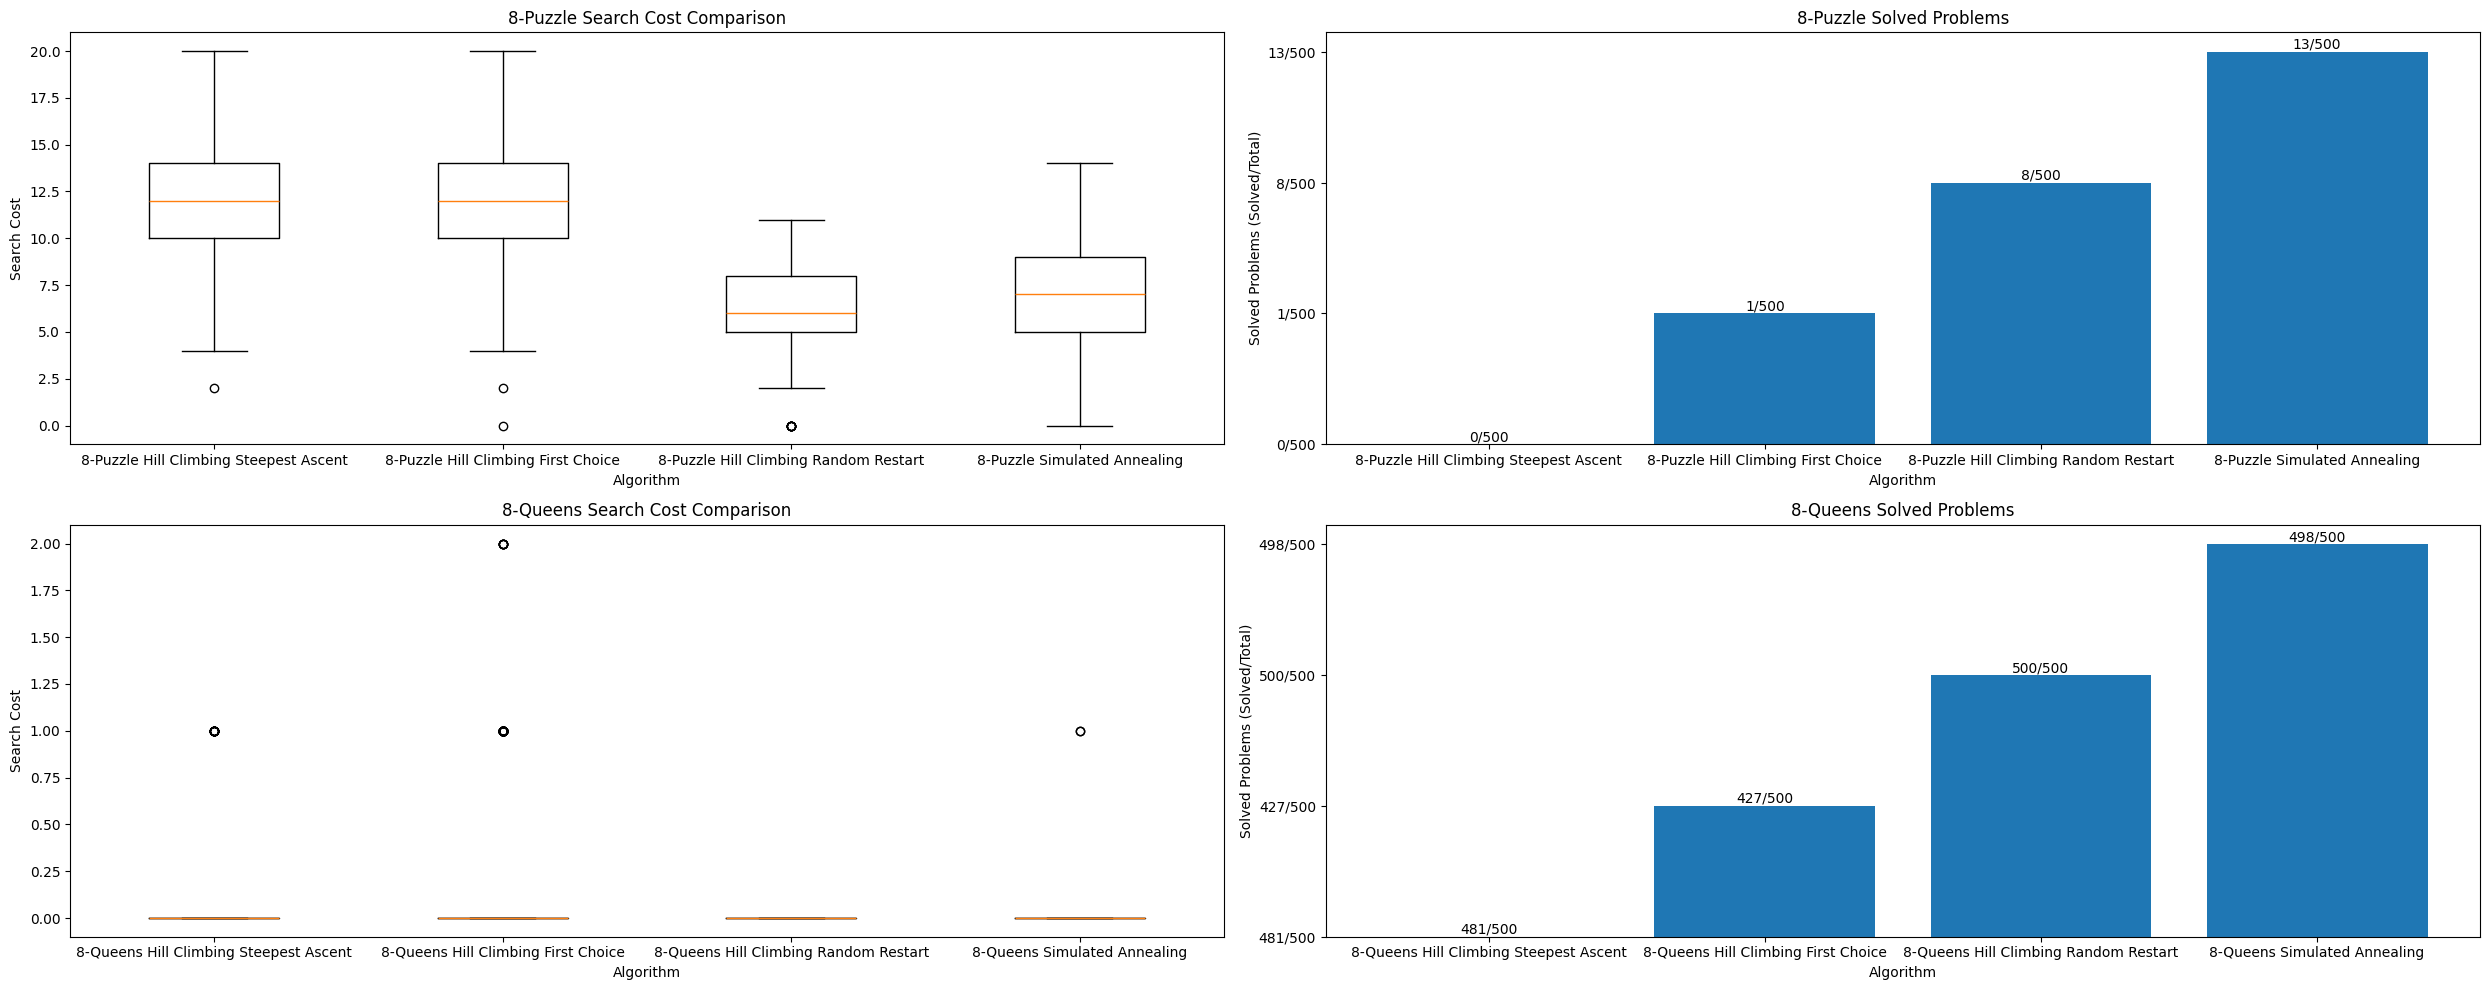

In [31]:
def visualize_search_costs(results):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 10))

    for i, problem in enumerate(["8-Puzzle", "8-Queens"]):
        search_costs_plot = axes[i][0]
        solved_problems_plot = axes[i][1]

        search_costs_data = []
        labels = []
        solved_problems_totals = []

        for algorithm_name, (search_costs, _) in results.items():
            if problem in algorithm_name:
                search_costs_data.append(search_costs)
                labels.append(algorithm_name)  # Move this inside the loop
                solved_problems_count = sum(cost == 0 for cost in search_costs)
                solved_problems_totals.append((solved_problems_count, len(search_costs)))

        search_costs_plot.boxplot(search_costs_data, labels=labels)  # Move this inside the loop
        search_costs_plot.set_title(f"{problem} Search Cost Comparison")
        search_costs_plot.set_xlabel("Algorithm")
        search_costs_plot.set_ylabel("Search Cost")

        solved_problems_data = [f"{solved}/{total}" for solved, total in solved_problems_totals]

        for bar, label in zip(solved_problems_plot.bar(labels, solved_problems_data), solved_problems_data):
            solved_problems_plot.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label,
                                      ha='center', va='bottom')

        solved_problems_plot.set_title(f"{problem} Solved Problems")
        solved_problems_plot.set_xlabel("Algorithm")
        solved_problems_plot.set_ylabel("Solved Problems (Solved/Total)")

    plt.tight_layout()
    plt.show()


def compare_algorithms(num_instances=500, max_restarts=15, initial_temperature=100, cooling_rate=0.99,
                       max_iterations=1000):
    algorithms = [
        ("8-Puzzle Hill Climbing Steepest Ascent", hc_sa_8_puzzle),
        ("8-Puzzle Hill Climbing First Choice", hc_fc_8_puzzle),
        ("8-Puzzle Hill Climbing Random Restart", hc_rr_8_puzzle),
        ("8-Puzzle Simulated Annealing", sa_8_puzzle),
        ("8-Queens Hill Climbing Steepest Ascent", hc_sa_8_queens),
        ("8-Queens Hill Climbing First Choice", hc_fc_8_queens),
        ("8-Queens Hill Climbing Random Restart", hc_rr_8_queens),
        ("8-Queens Simulated Annealing", sa_8_queens)
    ]

    results = {}
    for algorithm_name, algorithm_func in algorithms:
        search_costs = []
        execution_times = []
        for _ in range(num_instances):
            if "8-Puzzle" in algorithm_name:
                initial_state = gen_8p_init_state()
                check_state = check_puzzle_state
            else:
                initial_state = gen_8q_init_state()
                check_state = verify_queens_state

            start_time = time.time()
            if "Random Restart" in algorithm_name:
                solution = algorithm_func(initial_state, max_restarts)
            elif "Simulated Annealing" in algorithm_name:
                solution = algorithm_func(initial_state, initial_temperature, cooling_rate, max_iterations)
            else:
                solution = algorithm_func(initial_state)
            end_time = time.time()
            search_cost = check_state(solution)
            search_costs.append(search_cost)
            execution_times.append(end_time - start_time)
        results[algorithm_name] = (search_costs, execution_times)

    visualize_search_costs(results)

if __name__ == "__main__":
    compare_algorithms()

### All options vs. Optimal Solution - Comparison